<a href="https://colab.research.google.com/github/ShubhamKNIT/learn-python/blob/main/notebooks/02_nn_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Introduction to NN classification with TF

Classification problems:
- Binary Classification
- Multiclass Classification
- Multilabel Classification


## Generate Dataset

In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=7)

In [3]:
X

array([[-0.75681927, -0.27401115],
       [-0.48167671, -0.87409407],
       [-0.97024009, -0.25205207],
       ...,
       [ 0.744733  ,  0.33484256],
       [-0.78247498,  0.65396415],
       [-0.62324593,  0.84347736]])

In [4]:
y[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

### Let's try visualizing our data

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0], "X1" : X[:, 1], "y" : y});
circles

,X0,X1,y
0,-0.756819,-0.274011,1
1,-0.481677,-0.874094,0
2,-0.970240,-0.252052,0
3,-0.660944,-0.499074,1
4,-0.907931,0.408418,0
...,...,...,...
995,0.405450,0.694459,1
996,0.834156,-0.009121,1
997,0.744733,0.334843,1
998,-0.782475,0.653964,0


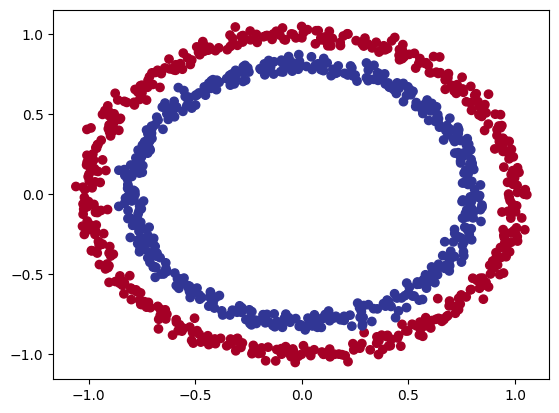

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
 X[:10], y[:10]

(array([[-0.75681927, -0.27401115],
        [-0.48167671, -0.87409407],
        [-0.97024009, -0.25205207],
        [-0.66094436, -0.49907384],
        [-0.90793058,  0.40841756],
        [ 0.41509873, -0.94636248],
        [-0.57674439, -0.58806687],
        [ 0.3842643 ,  0.9266862 ],
        [ 0.98037309, -0.14955743],
        [-0.56027967,  0.78041243]]),
 array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0]))

## Modelling

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [11]:
import tensorflow as tf

In [12]:
tf.random.set_seed(7)

# Define the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fit the model
history_1 = model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 5ms/step - loss: 0.6875 - accuracy: 0.5050
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6853 - accuracy: 0.5063
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6841 - accuracy: 0.5125
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5188
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5288
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5288
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5325
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5387
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5450
Epoch 11/

In [13]:
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 1.0000


[0.08353174477815628, 1.0]

In [14]:
y_preds_1 = model_1.predict(X_test)

7/7 [==============================] - 0s 2ms/step


## Visulizing Predictions

Let's create function `plot_decision_boundary()`:
- Take in a trained model, features(X), and labels(y)
- Create a meshgrid of the different X values
- Make predictions across the meshgrid
- Plot the predictions as well as a line between zones


In [15]:
import numpy as np

In [16]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """

    # define the axis boundaries of the plot and create a meshgrid
    x0_min, x0_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x1_min, x1_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx0, xx1 = np.meshgrid(np.linspace(x0_min, x0_max, 100),
                           np.linspace(x1_min, x1_max, 100))


    # ravel() is used to squeeze the 2d arrays into 1d array
    # np.c_ is stack arrays horizontally
    x_in = np.c_[xx0.ravel(), xx1.ravel()]

    # make predictions
    y_pred = model.predict(x_in)

    # check for multi-class
    if (len(y_pred[0]) > 1):
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx0.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx0.shape)

    plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


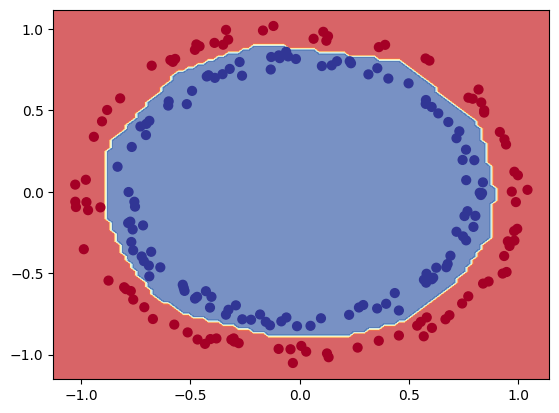

In [17]:
plot_decision_boundary(model_1,
                       X_test,
                       y_test)

In [18]:
x0_min, x0_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x1_min, x1_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x0_min, x0_max, 100),
                     np.linspace(x1_min, x1_max, 100))
xx, yy

(array([[-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        ...,
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479],
        [-1.16007506, -1.13668668, -1.1132983 , ...,  1.10859802,
          1.1319864 ,  1.15537479]]),
 array([[-1.15174787, -1.15174787, -1.15174787, ..., -1.15174787,
         -1.15174787, -1.15174787],
        [-1.12852468, -1.12852468, -1.12852468, ..., -1.12852468,
         -1.12852468, -1.12852468],
        [-1.10530149, -1.10530149, -1.10530149, ..., -1.10530149,
         -1.10530149, -1.10530149],
        ...,
        [ 1.10090179,  1.10090179,  1.10090179, ...,  

## Replicating activation functions

In [19]:
def RELU(x):
    return tf.maximum(0, x);

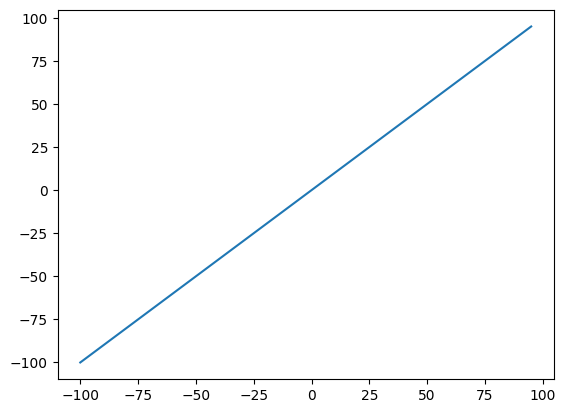

In [20]:
import numpy
x_ = tf.range(-100, 100, 5, dtype=tf.float32)
y_ = tf.range(-100, 100, 5, dtype=tf.float32)
plt.plot(x_, y_);

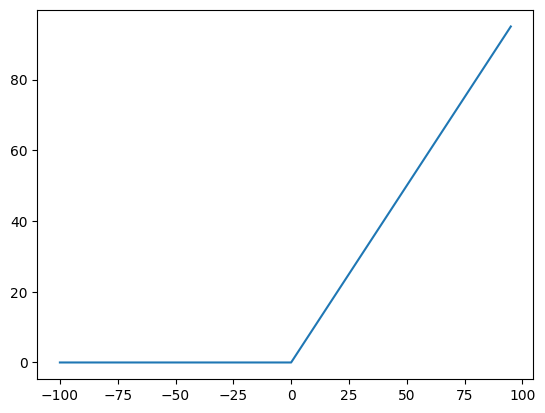

In [21]:
plt.plot(x_, RELU(y_));

In [22]:
def SIGMOID(x):
    return 1/(1 + tf.exp(-x));

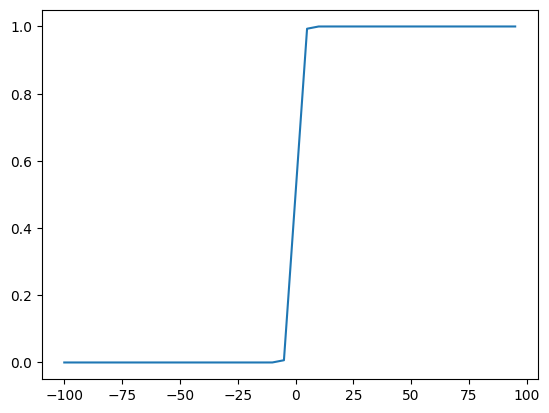

In [23]:
plt.plot(x_, SIGMOID(y_));

In [57]:
tf.random.set_seed(7)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='linear'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

history_2 = model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 2s 7ms/step - loss: 0.6950 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6768 - accuracy: 0.5412
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6691 - accuracy: 0.6037
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6616 - accuracy: 0.6037
Epoch 5/100
25/25 [==============================] - 0s 18ms/step - loss: 0.6422 - accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 1s 20ms/step - loss: 0.6147 - accuracy: 0.7175
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.5916 - accuracy: 0.7275
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.7225
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7650
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.7800
Epoch 1

In [58]:
model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 0.9650


[0.09014105051755905, 0.9649999737739563]

313/313 [==============================] - 0s 1ms/step
doing binary classification


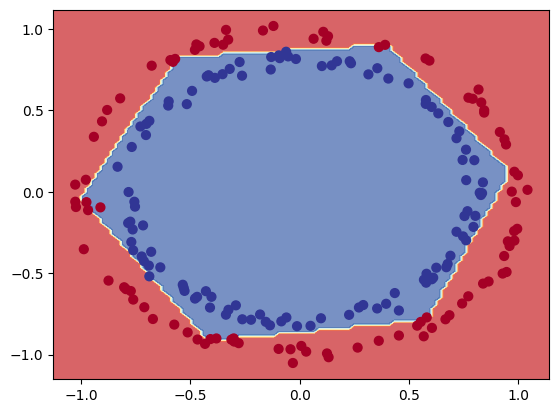

In [59]:
plot_decision_boundary(model_2, X_test, y_test)

In [27]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 10)                30        
                                                                 
 dense_48 (Dense)            (None, 5)                 55        
                                                                 
 dense_49 (Dense)            (None, 1)                 6         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0, 0.5, 'loss')

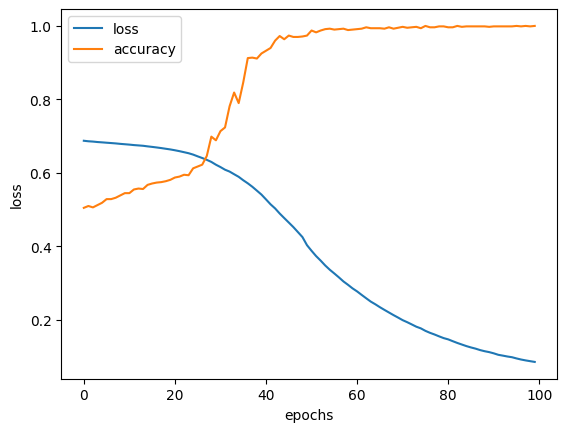

In [42]:
pd.DataFrame(history_1.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

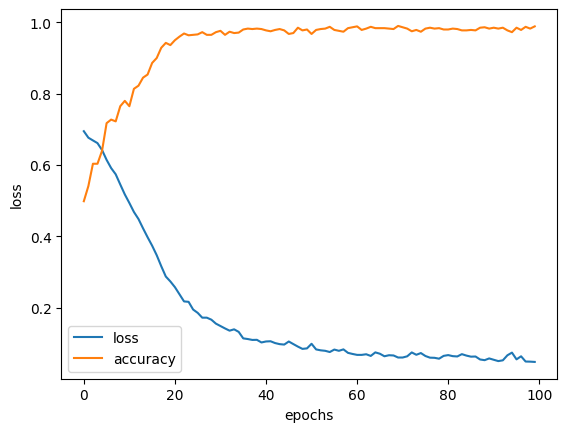

In [61]:
pd.DataFrame(history_2.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

## Comparing Models Side-by-Side

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


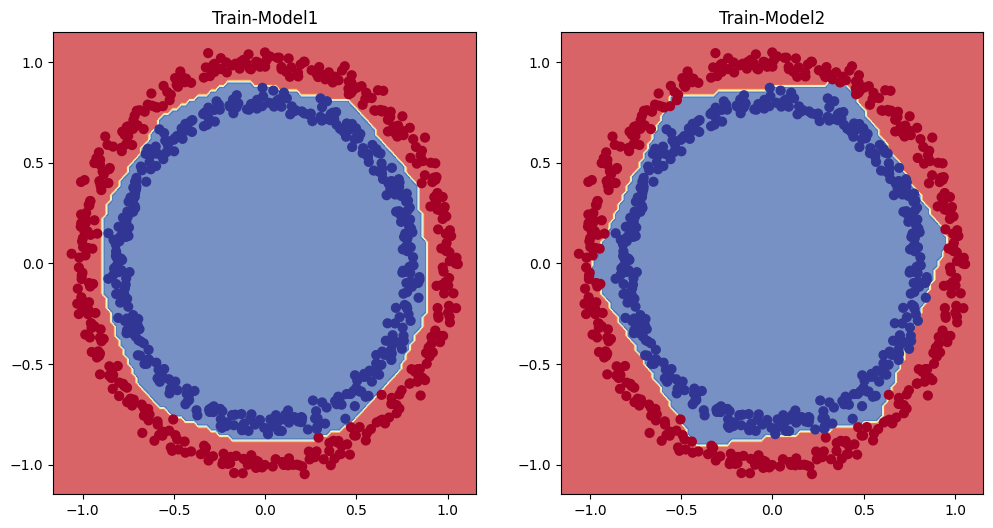

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train-Model1')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Train-Model2')
plot_decision_boundary(model_2, X_train, y_train)
plt.show();

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


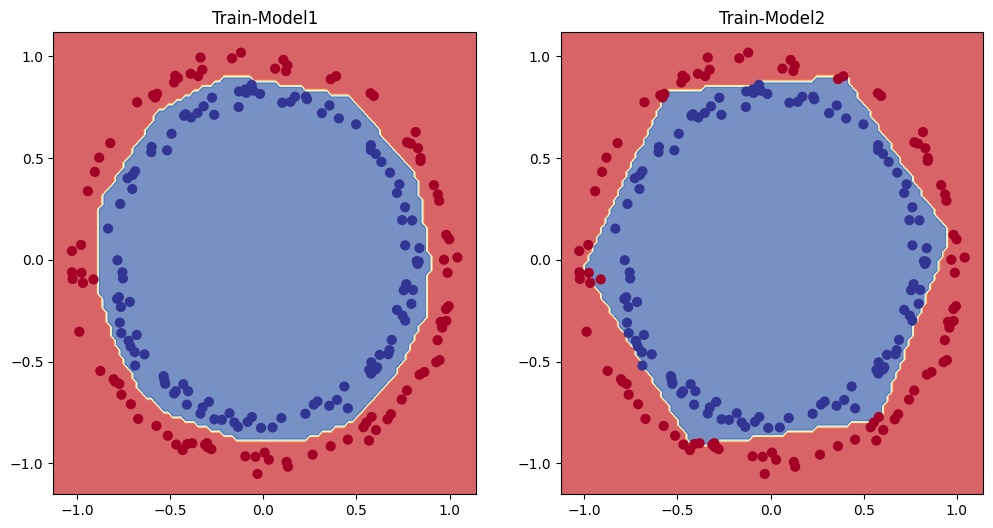

In [63]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train-Model1')
plot_decision_boundary(model_1, X_test, y_test)
plt.subplot(1, 2, 2)
plt.title('Train-Model2')
plot_decision_boundary(model_2, X_test, y_test)
plt.show();

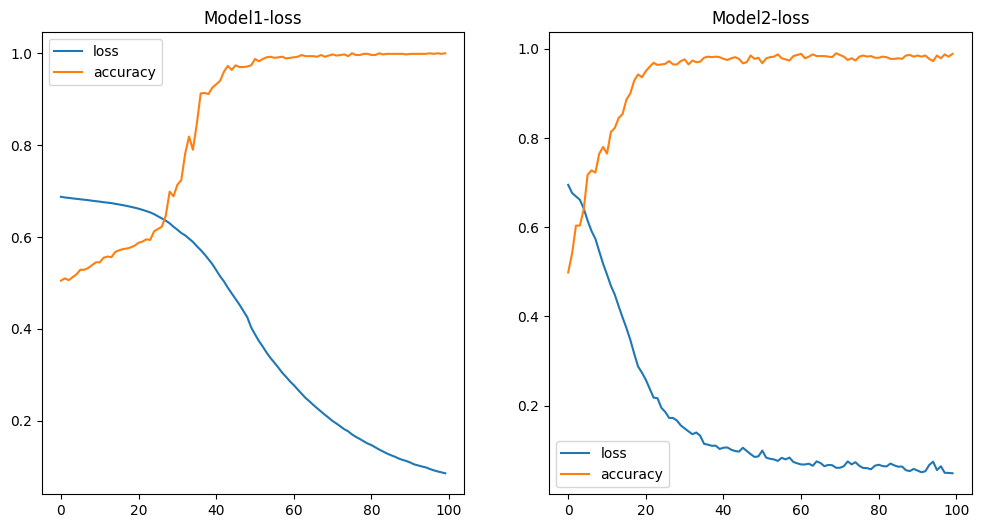

In [64]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['accuracy'])
plt.title('Model1-loss')
plt.legend(['loss', 'accuracy'])
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['accuracy'])
plt.title('Model2-loss')
plt.legend(['loss', 'accuracy'])
plt.show();

## Finding the best learning rate

- Introducing `learning rate callbacks` into the model
- Modified loss-curve plot

In [132]:
def scheduler(epoch, lr):
    return lr * tf.exp(-0.01)

lrs_cb = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

In [133]:
tf.random.set_seed(7)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = "Adam",
    metrics = ['accuracy']
)

history_3= model_3.fit(X_train, y_train, epochs = 100, callbacks=[lrs_cb])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7462 - accuracy: 0.4900 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7434 - accuracy: 0.4863 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7404 - accuracy: 0.4875 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7375 - accuracy: 0.4837 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7344 - accuracy: 0.4800 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7311 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7279 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7246 - accuracy: 0.4900 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

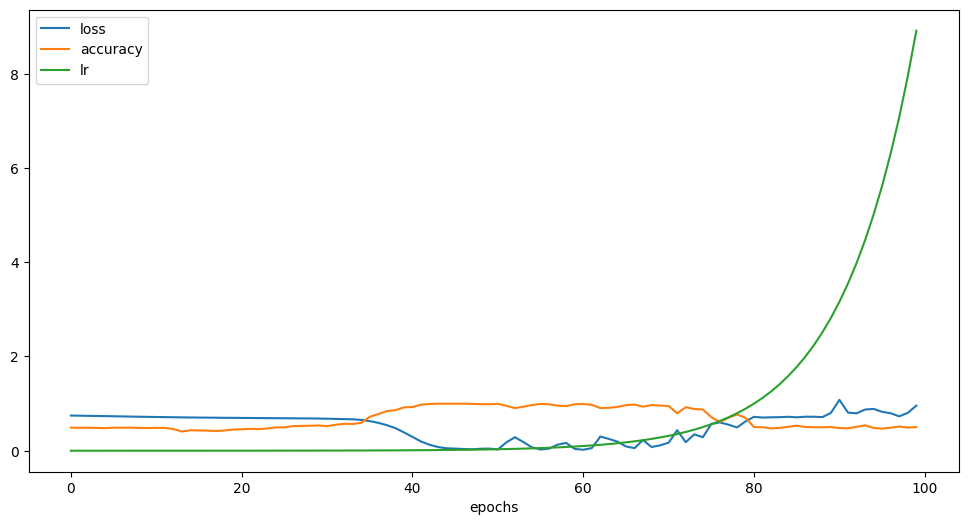

In [134]:
pd.DataFrame(history_3.history).plot(figsize=(12, 6), xlabel = 'epochs');

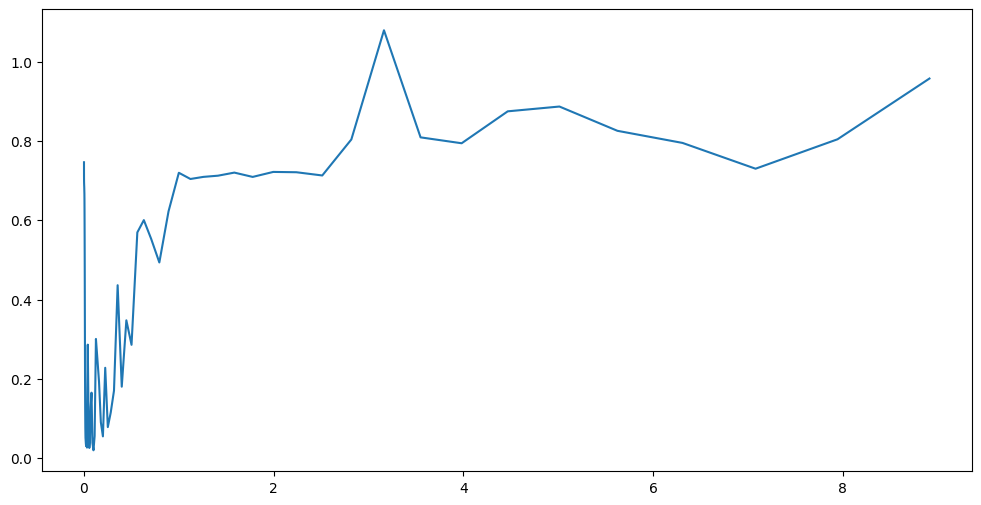

In [138]:
plt.figure(figsize=(12, 6))
plt.plot(history_3.history['lr'], history_3.history['loss']);